In [2]:
# we extract the data from Experimental runs excel file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#preparation of the data for linear regression
df = pd.read_excel("Experimental Runs.xlsx")
pd.set_option('display.max_rows', None)
df = df.iloc[72:85, :]
df.drop(df.columns[[0, 4, 8, 9, 10, 11, 12]], axis=1, inplace=True)
df.drop(df.loc[:, 'Unnamed: 13':'Unnamed: 25'].columns, axis = 1, inplace = True)
df.rename(columns={'RMS': 'Slope of the line'},inplace=True)
df

,Cutting Speed (m/min),Feed (mm/rec),Depth of cut (mm),RPM,Diameter(mm),Slope of the line
72,40.6,0.142,0.7,290.0,45.0,0.2912
73,45.0,0.166,0.3,290.0,50.0,0.1392
74,44.0,0.170,0.5,290.0,48.0,0.3458
75,55.0,0.142,0.5,290.0,60.0,0.1642
76,50.0,0.150,0.5,290.0,55.0,0.1449
77,44.0,0.142,0.3,290.0,49.0,0.2385
78,44.0,0.142,0.3,290.0,49.0,0.2205
79,44.0,0.142,0.3,290.0,49.0,0.2458
80,27.0,0.153,0.3,190.0,45.0,0.0981
81,42.8,0.170,0.2,290.0,47.0,0.4271


In [7]:
#initializing the model
from sklearn.model_selection import train_test_split
X = df.iloc[:, 0:5]
y = df["Slope of the line"]
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
y_train = y_train.astype('float')
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [8]:
#training the model
from sklearn.svm import SVR
regressor = SVR(kernel = 'poly', degree=3)
regressor.fit(X_train, y_train)

SVR(kernel='poly')

In [9]:
#testing the model
y_predict = regressor.predict(X_test)
# y_predict = y_predict.reshape(-1, 1)
# y_hat = scaler.inverse_transform(y_predict)

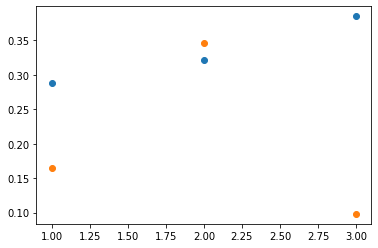

In [13]:
x_array = list(range(1, 4))
plt.scatter(x_array, y_predict)
plt.scatter(x_array, y_test)